---
---

# 1. Setup

---
---

### Import Packages


##### Import the general packages

In [ ]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

##### Import the packages for the classification

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

##### Import and setup the Json package for loading in and storing data

In [ ]:
import json

class JSONEncoder(json.JSONEncoder):
    def default(self, obj):
        if hasattr(obj, 'to_json'):
            return obj.to_json(orient='records')
        return json.JSONEncoder.default(self, obj)

### Set the maximum number of rows and column in the outputs

In [ ]:
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 50)

### Mount the drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Set the directory for reading the data

In [ ]:
# os.chdir('/content/drive/My Drive/4th Year/CA4015/assignment2/Submission/data')    # Ivan's directory
os.chdir('/content/drive/My Drive/assignment2/Submission/data')                     # Nathan's directory

---
---

# 2. Read in the data

---
---

### Read in the filtered extracted_features dictionary from the Json file

In [ ]:
json_filtered_extract_features_df_data = json.load(open('map_subject_id_to_its_filtered_extracted_features_df.json'))

In [ ]:
subject_id_to_filtered_extracted_feature_df_map = {}
for subject_id, sensor_df in tqdm(json_filtered_extract_features_df_data.items()):
    subject_id_to_filtered_extracted_feature_df_map[subject_id] = pd.read_json(json_filtered_extract_features_df_data[subject_id])

##### Manually inspect the features in this dictionary

In [ ]:
for student_id, df in subject_id_to_filtered_extracted_feature_df_map.items():
    print("--------------------", student_id, "--------------------")
    print("This subject has the shape", df.shape, "\n")

-------------------- 46343 --------------------
This subject has the shape (553, 357) 

-------------------- 759667 --------------------
This subject has the shape (474, 385) 

-------------------- 781756 --------------------
This subject has the shape (980, 270) 

-------------------- 844359 --------------------
This subject has the shape (897, 362) 

-------------------- 1066528 --------------------
This subject has the shape (947, 653) 

-------------------- 1360686 --------------------
This subject has the shape (925, 263) 

-------------------- 1449548 --------------------
This subject has the shape (953, 395) 

-------------------- 1455390 --------------------
This subject has the shape (955, 207) 

-------------------- 1818471 --------------------
This subject has the shape (958, 293) 

-------------------- 2598705 --------------------
This subject has the shape (954, 384) 

-------------------- 2638030 --------------------
This subject has the shape (948, 183) 

---------------

### Read in the unfiltered_extracted_features dictionary from the Json file

In [ ]:
json_unfiltered_extract_features_df_data = json.load(open('map_subject_id_to_its_unfiltered_extracted_features_df.json'))

In [ ]:
subject_id_to_unfiltered_extracted_feature_df_map = {}
for subject_id, sensor_df in tqdm(json_unfiltered_extract_features_df_data.items()):
    subject_id_to_unfiltered_extracted_feature_df_map[subject_id] = pd.read_json(json_unfiltered_extract_features_df_data[subject_id])

##### Manually inspect the features in this dictionary

In [ ]:
for subject_id, df in subject_id_to_unfiltered_extracted_feature_df_map.items():
    print("--------------------", subject_id, "--------------------")
    print("This subject has the shape", df.shape, "\n")

-------------------- 46343 --------------------
This subject has the shape (553, 1058) 

-------------------- 759667 --------------------
This subject has the shape (474, 1058) 

-------------------- 781756 --------------------
This subject has the shape (980, 1058) 

-------------------- 844359 --------------------
This subject has the shape (897, 1058) 

-------------------- 1066528 --------------------
This subject has the shape (947, 1755) 

-------------------- 1360686 --------------------
This subject has the shape (925, 1058) 

-------------------- 1449548 --------------------
This subject has the shape (953, 1058) 

-------------------- 1455390 --------------------
This subject has the shape (955, 1058) 

-------------------- 1818471 --------------------
This subject has the shape (958, 1058) 

-------------------- 2598705 --------------------
This subject has the shape (954, 1058) 

-------------------- 2638030 --------------------
This subject has the shape (948, 1058) 

----

### Read in the no step filtered extracted_features dictionary from the Json file

In [ ]:
json_no_step_filtered_extract_features_df_data = json.load(open('no_step_map_subject_id_to_its_filtered_extracted_features_df.json'))

In [ ]:
subject_id_to_no_step_filtered_extracted_feature_df_map = {}
for subject_id, sensor_df in tqdm(json_no_step_filtered_extract_features_df_data.items()):
    subject_id_to_no_step_filtered_extracted_feature_df_map[subject_id] = pd.read_json(json_no_step_filtered_extract_features_df_data[subject_id])

##### Manually inspect the features in this dictionary

In [ ]:
for subject_id, df in subject_id_to_no_step_filtered_extracted_feature_df_map.items():
    print("--------------------", subject_id, "--------------------")
    print("This subject has the shape", df.shape, "\n")

-------------------- 46343 --------------------
This subject has the shape (553, 357) 

-------------------- 759667 --------------------
This subject has the shape (474, 385) 

-------------------- 781756 --------------------
This subject has the shape (980, 270) 

-------------------- 844359 --------------------
This subject has the shape (897, 362) 

-------------------- 1066528 --------------------
This subject has the shape (947, 653) 

-------------------- 1360686 --------------------
This subject has the shape (925, 263) 

-------------------- 1449548 --------------------
This subject has the shape (953, 395) 

-------------------- 1455390 --------------------
This subject has the shape (955, 207) 

-------------------- 1818471 --------------------
This subject has the shape (958, 293) 

-------------------- 2598705 --------------------
This subject has the shape (954, 384) 

-------------------- 2638030 --------------------
This subject has the shape (948, 183) 

---------------

### Read in the dictionary mapping the psg_status' to the session_id's that are classed as tis psg_status

In [ ]:
map_subject_id_to_a_map_of_the_session_id_to_psg_status = json.load(open('map_subject_id_to_a_map_of_the_session_id_to_psg_status.json'))

### Create an inverted version of this map - mapping psg_status to the session_id's

In [ ]:
map_subject_id_to_a_map_of_the_psg_status_to_session_id = {}

for subject_id, subjects_session_to_psg_map in map_subject_id_to_a_map_of_the_session_id_to_psg_status.items():

    subjects_psg_to_session_map = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    for session_id, psg_status in subjects_session_to_psg_map.items():
      
        subjects_psg_to_session_map[psg_status].append(int(session_id))

    map_subject_id_to_a_map_of_the_psg_status_to_session_id[subject_id] = subjects_psg_to_session_map

##### Manually inspect this dictionary

In [ ]:
i = 0
for sub_id, psg_to_id_dict in map_subject_id_to_a_map_of_the_psg_status_to_session_id.items():

    # print the subject_id
    print("----------------", sub_id, "---------------------")

    # iterate through the dictionary and print the values
    for psg_status, session_id in psg_to_id_dict.items():
        print(psg_status, "->", session_id)

    # stop after 2 subjects
    if i == 1:
        break
    i = i + 1

---------------- 46343 ---------------------
0 -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 110, 111, 112, 113, 132, 305, 384, 397, 398, 399, 461, 462, 493, 494, 510, 511, 515, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552]
1 -> [34, 35, 36, 37, 114, 306, 307, 320, 323, 324, 325, 327, 328, 385, 386, 400, 413, 463, 464, 495, 496, 500, 512, 513, 514, 516, 517, 518, 519]
2 -> [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 115, 116, 117, 118, 119, 133, 134, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 321, 322, 326, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 401, 402, 403

---
---

# 3. Create the functions needed for the classification

---
---

### Create a function to create the dataset and y needed in the classification using these extracted features

In [ ]:
def create_map_of_subject_id_to_the_dataset_and_y_for_all_psg_status(subject_id_to_extracted_feature_df_map, map_subject_id_to_a_map_of_the_psg_status_to_session_id, map_subject_id_to_a_map_of_the_session_id_to_psg_status):

    map_subject_id_to_all_psg_dataset_and_y = {}
    map_subject_id_to_binary_dataset_and_y = {}

    for subject_id, extracted_features_df in tqdm(subject_id_to_extracted_feature_df_map.items()):

        # get the map of psg_status to session_id for this subject
        subjects_psg_to_session_map = map_subject_id_to_a_map_of_the_psg_status_to_session_id[subject_id]

        # get the map of session_id to psg_status for this subject
        subjects_session_to_psg_map = map_subject_id_to_a_map_of_the_session_id_to_psg_status[subject_id]

        # group the features based on their sleep states 
        zero_features = extracted_features_df.iloc[subjects_psg_to_session_map[0], :].values
        one_features = extracted_features_df.iloc[subjects_psg_to_session_map[1], :].values
        two_features = extracted_features_df.iloc[subjects_psg_to_session_map[2], :].values
        three_features = extracted_features_df.iloc[subjects_psg_to_session_map[3], :].values
        four_features = extracted_features_df.iloc[subjects_psg_to_session_map[4], :].values
        five_features = extracted_features_df.iloc[subjects_psg_to_session_map[5], :].values

        # Creating the feature vector for all the psg_status' to be used as the training data
        all_psg_status_dataset = np.vstack((zero_features, one_features, two_features, three_features, four_features, five_features))

        # Creating labels here as the target vector
        all_psg_status_y = list(subjects_session_to_psg_map.values())

        # ensure that the dataset and y are the same size
        assert len(binary_psg_status_dataset) == len(binary_psg_status_y)
        
        # create a dictionary mapping each subject_id to a tuple of the dataset and 'y' for all of the different psg_status'
        map_subject_id_to_all_psg_dataset_and_y[subject_id] = (all_psg_status_dataset, all_psg_status_y)

    return map_subject_id_to_all_psg_dataset_and_y

In [ ]:
def create_map_of_subject_id_to_the_dataset_and_y_for_only_awake_and_asleep_psg_status(subject_id_to_extracted_feature_df_map, map_subject_id_to_a_map_of_the_psg_status_to_session_id, map_subject_id_to_a_map_of_the_session_id_to_psg_status):

    map_subject_id_to_all_psg_dataset_and_y = {}
    map_subject_id_to_binary_dataset_and_y = {}

    for subject_id, extracted_features_df in tqdm(subject_id_to_extracted_feature_df_map.items()):

        # get the map of psg_status to session_id for this subject
        subjects_psg_to_session_map = map_subject_id_to_a_map_of_the_psg_status_to_session_id[subject_id]

        # get the map of session_id to psg_status for this subject
        subjects_session_to_psg_map = map_subject_id_to_a_map_of_the_session_id_to_psg_status[subject_id]

        # group the features based on whether the person is awake or asleep 
        awake_features = extracted_features_df.iloc[subjects_psg_to_session_map[0], :].values
        asleep_features = extracted_features_df.iloc[subjects_psg_to_session_map[1] + subjects_psg_to_session_map[2] + subjects_psg_to_session_map[3] + subjects_psg_to_session_map[4] + subjects_psg_to_session_map[5], :].values

        # Creating the feature vector for the awake and asleep features to be used as the training data
        binary_psg_status_dataset = np.vstack((awake_features, asleep_features))

        # Creating labels here as the target vector - as the above 'y' list contains all psg_status', we need to change it so that it only contains binary values
        all_psg_status_y = list(subjects_session_to_psg_map.values())
        binary_psg_status_y = []
        for binary_val in all_psg_status_y:
            # replace the multiple sleep stats with a binary value fo sleep and awake
            if binary_val in [2, 3, 4, 5]:
                binary_val = 1
            binary_psg_status_y.append(binary_val)

        # ensure that the dataset and y are the same size
        assert len(binary_psg_status_dataset) == len(binary_psg_status_y)

        # create a dictionary mapping each subject_id to a tuple of the dataset and 'y' for all of the different psg_status'
        map_subject_id_to_binary_dataset_and_y[subject_id] = (binary_psg_status_dataset, binary_psg_status_y)

    return map_subject_id_to_binary_dataset_and_y

### Create functions to classify the dataset and y

In [ ]:
def create_fit_and_score_the_model(classifier_dict, X_train, y_train, X_test, y_test, optimised_boolean, cv_settings):

    if optimised_boolean:
        # create an optimised model by cross validating with the various parameters
        clf = make_pipeline(StandardScaler(), GridSearchCV(classifier_dict['model'], classifier_dict['parameters'], cv=cv_settings, refit=True))

    else:
        # create the default model
        clf = make_pipeline(StandardScaler(), classifier_dict['model'])

    # train the classifier
    clf.fit(X_train, y_train)

    # get a prediction for y based on a test set
    y_pred = clf.predict(X_test)

    # output a report on the precision and recall to ensure that the model is not cheating by just predicting the most common class
    class_report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # we now have the best parameters to use with the classifier
    score = clf.score(X_test, y_test)

    return score, class_report_dict

In [ ]:
def classify(map_subject_id_to_dataset_and_y, names_of_models_to_test, cv_settings, optimise_params_bool, classifier_report_bool):

    # create dataframe for storing results
    score_results = pd.DataFrame(columns=["subject_id"].extend(names_of_models_to_test))
    map_subject_to_classifier_to_classification_report = {}

    for subject_id, tuple_of_dataset_and_y in tqdm(map_subject_id_to_dataset_and_y.items()):

        # skip the subjects that are causing us problems
        # we suspect that it is becauce there are some rows with psg_status = '4' which, based on the input data and the paper asssociated with the dataset, shoulcn't be there
        if subject_id in ['5383425', '8258170', '9618981']:
            continue

        # assign the dataset and the 'y' variable
        dataset = tuple_of_dataset_and_y[0]
        y = tuple_of_dataset_and_y[1]

        # create train-test split
        X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.33, random_state=42)

        # create a dictionery to map classifier to a score
        row_of_scores_df = pd.DataFrame(columns=["subject_id"].extend(names_of_models_to_test), index=[0])

        # populate the row with subject_id
        row_of_scores_df.loc[0, 'subject_id'] = subject_id

        map_classifiers_to_classification_report = {}

        # for each model we score the parameters and we can then get an average for each set of parameters
        for classifier_name, classifier_dict in classifiers.items():

            # skip the mulit-layer perceptron classifier as the output to this classifier is messy
            # the reuslts from this classifier are still valid
            if classifier_name == 'MLP':
                continue
            
            # create a model, train it and test it to produce a score
            score, classification_report_dict = create_fit_and_score_the_model(classifier_dict, X_train, y_train, X_test, y_test, optimise_params_bool, cv_settings)

            # add this score to the scores from the other classifiers for this subject
            row_of_scores_df.loc[0, classifier_name] = score

            # add the classification report to a dictionary
            map_classifiers_to_classification_report[classifier_name] = classification_report_dict

        map_subject_to_classifier_to_classification_report[subject_id] = map_classifiers_to_classification_report

        # Add the row of scores to the row of scores recorded for the other subjects
        score_results = pd.concat([score_results, row_of_scores_df], axis=0)

    if classifier_report_bool:
        return score_results.reset_index(drop=True), map_subject_to_classifier_to_classification_report

    else:
        return score_results.reset_index(drop=True)

---
---

# 4. Classify the data

---
---

### Configurate the model variables needed for the classification

##### Set out the names and parameters of the classifier models we will use

In [ ]:
names_of_models_to_test = ['SVC', 'Decision Tree', 'K-Neighbours', 'MLP']

model_function_for_these_models = [SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), MLPClassifier()]

params_for_these_models = [{'kernel':('linear', 'rbf'), 'degree':[2, 3], 'gamma':['auto', 'scale'], 'C':[1, 10]}, #{'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'degree':[2, 10], 'gamma':['auto', 'scale'], 'C':[1, 10]}
                           {'criterion':('gini', 'entropy'), 'splitter':('best', 'random')}, #plenty more to add if needed
                           {'n_neighbors':[3,10], 'weights':('uniform', 'distance')},
                           {'activation':('identity', 'logistic', 'tanh', 'relu'), 'alpha':[0.0001,0.0002]},
                          ]

##### For each model we will use, create a dictionary to store its variables

In [ ]:
classifiers = {}
for i in range(len(names_of_models_to_test)):

    model_name = names_of_models_to_test[i]
    model_function = model_function_for_these_models[i]
    model_params = params_for_these_models[i]

    classifiers[model_name] = {}
    classifiers[model_name]["model"] = model_function
    classifiers[model_name]["parameters"] = model_params

print(classifiers)

{'SVC': {'model': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'parameters': {'kernel': ('linear', 'rbf'), 'degree': [2, 3], 'gamma': ['auto', 'scale'], 'C': [1, 10]}}, 'Decision Tree': {'model': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'parameters': {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random')}}, 'K-Neighbours': {'model': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

##### Set how many splits we use in cross-validation

In [ ]:
cv_settings = KFold(n_splits=4, shuffle=True)

---

## Our Hypothesis


---

Throughout the course of our project, we made a couple of tough decicions in relation to what way we wanted to deal with the data in order to try get the most accurate model we could when it came to the classification task. These decisions were based on hypotheses we had on what we thought would positively effect the model.
1.   We decided to include the the step count data
2.   We decided to subset the extracted features by selecting the most relevant ones
3.   We decided to run our classificaton models using multiple variations of the different parameters to then use cross-validation to optimise these parameters

These hypothesese results in us running our classification algorithms using optimised parameters, on a subset of the extracted features where the step count data is included.

The below code will emulate this approach to see what sort of accuracy our classification algorithm has under these conditions.


#### Create a dictionary mapping subject_id to the dataset and the y needed for the classification

In [ ]:
filtered_features_all_psg_dataset_and_y = create_map_of_subject_id_to_the_dataset_and_y_for_all_psg_status(subject_id_to_filtered_extracted_feature_df_map, map_subject_id_to_a_map_of_the_psg_status_to_session_id, map_subject_id_to_a_map_of_the_session_id_to_psg_status)

#### Classify the sleep states of the sessions for each subject

In [ ]:
optimise_params_bool = True
classification_report_bool = True
baseline_results, baseline_classification_report_dict = classify(filtered_features_all_psg_dataset_and_y, names_of_models_to_test, cv_settings, optimise_params_bool, classification_report_bool)

#### Analyse these results

##### Output the results of the score each classifier got for each subject

* 3 subjects are not included here because they were giving an error when creating the dataset and y

In [ ]:
baseline_results

,subject_id,SVC,Decision Tree,K-Neighbours
0,46343,0.524590,0.535519,0.420765
1,759667,0.554140,0.649682,0.503185
2,781756,0.589506,0.496914,0.561728
3,844359,0.548822,0.612795,0.535354
4,1066528,0.523962,0.549521,0.533546
5,1360686,0.620915,0.653595,0.637255
6,1449548,0.685714,0.698413,0.666667
7,1455390,0.705696,0.705696,0.715190
8,1818471,0.533123,0.564669,0.545741
9,2598705,0.609524,0.536508,0.523810


##### Describe this dataframe better with summary statistics

In [ ]:
baseline_results.describe()

,SVC,Decision Tree,K-Neighbours
count,28.000000,28.000000,28.000000
mean,0.601326,0.616065,0.593656
std,0.050517,0.086878,0.061696
min,0.523962,0.490566,0.420765
25%,0.568501,0.552014,0.557732
50%,0.602875,0.608219,0.602220
75%,0.631054,0.650660,0.628270
max,0.709265,0.878049,0.715190


##### Plot these summary statistics to better visualise them

A box plot is perfect for this situation as it gives us a comprehenensive comparison between the different models we looked at

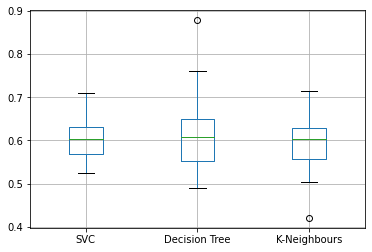

In [ ]:
baseline_results.boxplot()

The above plot tells us a number of important things about the results of these classifiers. Firstly, we can see that the interquartile range of these data is biggest in the Decision Tree classifier, meaning that the classification accuracy of the middle 50% of data points is more spread out than that of the  the other classifiers. We can also see that the boxplots minimum and maximum values for each of these classifiers gave a greater range in the Decision Tree Classifier than in the others. This means that the accuracy of this model in particular is more inconsistant than the others we tested.

Outside of the interquartile range, we can also see the average classification scores of each of these models. The green line shows that the Decision Tree Classifier gives the best average classification score but this is not by much. The SVC and K-Neighbours classifier have a similar average accuracy, however, the K-Neighbours classifier's Q3 value is lower than that of the SVC model and it also contains an outlier much below the rest of the data. This suggests to me that K-Neighbours is possibly not a good fit for the data as unlike the Decision Tree model, its outliers are on the poorer side and even the bulk of its classifications do not beat those of the SVC model.

From all of this, we concluded that the Decision Tree was the best model and it could be used as a baseline of our hypothesised optimal classifier. Using this, we also wanted to test the results in the case where we didn't make the decisions that we did to arrive at our hypothsised optimal model.

Our next step involves experimenting with the alternate approach to the one we took through the course of 3 experiments. These experaments are to test the following scenario:

1.   Test the results of not filtering the extracted features Vs the baseline filtered features
2.   Test the results of not including the step count in the data Vs the baseline data with the step count
3.   Test the results of ot optimising the parameters Vs the basline optimised parameters



---

## Experiment 1 - Classify the sleep state using filtered extracted features Vs the unfiltered extracted features


---

This is our first experiment, where we test if it was a good decision to filter the extracted features. Here, we will follow the same approach as we did with our hypothesis results and then we will compare the results to make a conclusion.

#### Get the dataset and y for the unfiltered data

In [ ]:
unfiltered_features_all_psg_dataset_and_y = create_map_of_subject_id_to_the_dataset_and_y_for_all_psg_status(subject_id_to_unfiltered_extracted_feature_df_map, map_subject_id_to_a_map_of_the_psg_status_to_session_id, map_subject_id_to_a_map_of_the_session_id_to_psg_status)

#### Classify the dataset and y for the unfiltered data

** We could not run this experiment due to the below error and didn't have enough time to fix it so this experiment cannot be run **

In [ ]:
optimise_params_bool = True
classification_report_bool = False
unfiltered_results = classify(unfiltered_features_all_psg_dataset_and_y, names_of_models_to_test, cv_settings, optimise_params_bool, classification_report_bool)

### Analyse the results

##### Output the results of the score each classifier got for each subject

In [ ]:
unfiltered_results

,subject_id,SVC,Decision Tree,K-Neighbours
0,46343,0.453552,0.612022,0.387978
1,759667,0.522293,0.707006,0.541401
2,781756,0.506173,0.506173,0.561728
3,844359,0.508418,0.535354,0.518519
4,1066528,0.488818,0.498403,0.485623
5,1360686,0.529412,0.555556,0.568627
6,1449548,0.650794,0.590476,0.653968
7,1455390,0.702532,0.686709,0.693038
8,1818471,0.533123,0.586751,0.548896
9,2598705,0.584127,0.501587,0.539683


##### Describe this dataframe better with summary statistics

In [ ]:
unfiltered_results.describe()

,SVC,Decision Tree,K-Neighbours
count,28.000000,28.000000,28.000000
mean,0.545824,0.572728,0.542089
std,0.061756,0.068636,0.067519
min,0.390244,0.462264,0.365854
25%,0.507856,0.535003,0.516162
50%,0.532485,0.557682,0.547611
75%,0.584261,0.588796,0.569215
max,0.702532,0.710145,0.693038


From this, we see that the minimum accuracy score for the SVC and K-Neighbours classifiers are very low at only 39% and 36% respectively. We also see that the average mean score across the clasifiers is below that of the baseline.
The Decision Tree classifier also comes out on top as the best classifier here.

##### Plot these summary statistics to better visualise them

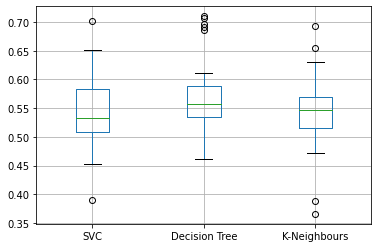

In [ ]:
unfiltered_results.boxplot()

This plot illustrates the data in a really nice way and delecately displays the insights in a sussinct way. It shows the decision tree classifier as head and shoulders above the other classifiers in terms of acuracy with the box containing the majority of its values havingn a higher accuracy than that of the other models.

### Compare this with the results of our hypothesised optimal model

When it comes to comparing the difference betweeen this approach and the baseline approach, we want too first join their results dataframes together and then use this joined dataframe to analyse the difference.

##### Join the two datafarames together so we can easily compare them

In [ ]:
col_order = ["subject_id", "SVC_Baseline", "SVC_unfiltered", "Decision Tree_Baseline", "Decision Tree_unfiltered", "K-Neighbours_Baseline", "K-Neighbours_unfiltered"]

baseline_and_unfiltered = baseline_results.merge(unfiltered_results, how='inner', on='subject_id', suffixes=['_Baseline', '_unfiltered'])[col_order]

##### Output the joined dataframe to compare the classifier scores manually

In [ ]:
baseline_and_unfiltered

,subject_id,SVC_Baseline,SVC_unfiltered,Decision Tree_Baseline,Decision Tree_unfiltered,K-Neighbours_Baseline,K-Neighbours_unfiltered
0,46343,0.524590,0.453552,0.557377,0.612022,0.453552,0.387978
1,759667,0.566879,0.522293,0.700637,0.707006,0.503185,0.541401
2,781756,0.589506,0.506173,0.493827,0.506173,0.561728,0.561728
3,844359,0.548822,0.508418,0.545455,0.535354,0.542088,0.518519
4,1066528,0.523962,0.488818,0.549521,0.498403,0.520767,0.485623
5,1360686,0.620915,0.529412,0.666667,0.555556,0.640523,0.568627
6,1449548,0.685714,0.650794,0.682540,0.590476,0.666667,0.653968
7,1455390,0.718354,0.702532,0.737342,0.686709,0.715190,0.693038
8,1818471,0.533123,0.533123,0.605678,0.586751,0.555205,0.548896
9,2598705,0.609524,0.584127,0.561905,0.501587,0.523810,0.539683


Looking at this plot doesn't make anything in particular stand out so we will deed to summarise these results.

##### Describe this dataframe

In [ ]:
baseline_and_unfiltered.describe()

,SVC_Baseline,SVC_unfiltered,Decision Tree_Baseline,Decision Tree_unfiltered,K-Neighbours_Baseline,K-Neighbours_unfiltered
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.600997,0.545824,0.614820,0.572728,0.592458,0.542089
std,0.052381,0.061756,0.068533,0.068636,0.059108,0.067519
min,0.523962,0.390244,0.490566,0.462264,0.453552,0.365854
25%,0.566773,0.507856,0.560773,0.535003,0.559533,0.516162
50%,0.602875,0.532485,0.609801,0.557682,0.596825,0.547611
75%,0.631054,0.584261,0.675563,0.588796,0.628270,0.569215
max,0.718354,0.702532,0.737342,0.710145,0.715190,0.693038


This is where we really start to see the insights. The baseline is displayed beside its corrosponding row under this unfiltered approach and as we compare these side-by-side columns, we can see the common pattern where our baselike comes out ahead. In all of the important categories, our baseline models
 are more accurate than the models trained on the unfiltered data.

 The below plot can show this more clearly.

##### Plot the classifiers

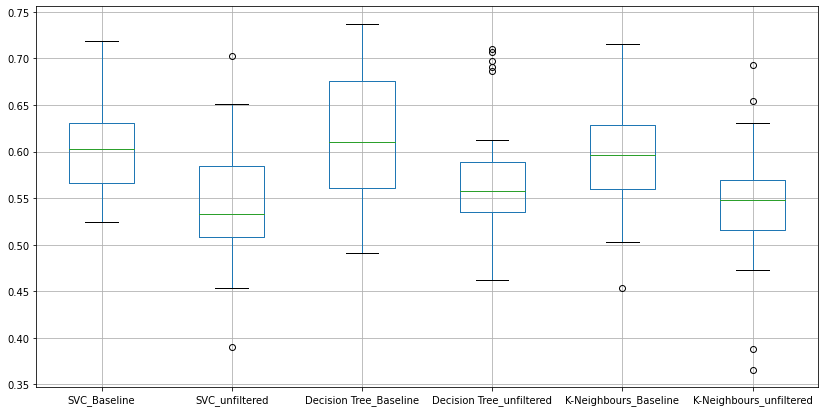

In [ ]:
baseline_and_unfiltered.boxplot(figsize=(14,7))

This plot shows that the basline models in this experiment are much better than the models trained on the unfiltered data.
This tells us that selecting and filtering the features increased the accuracy of our model by quite a bit.

While we were confident in our hypothesis, this experiment was the one where we weren't quite sure if it was true.
One concern we had was whether more features might mean the model has more data to use to classify the features and so might be more accurate.
This proved to be very unture and showed how the tsfresh select_features is a massive asset to our pipeline and improves the accuracy greatly.

---

## Experiment 2 - Classify the sleep state using the step count column in our data Vs without the step count column


---

This experiment was a verification of our intuition. The reason we wanted to test this was because during one of our lectures, Eoin had said that we don't need the step count data for this assignment. We thought that this sounded slightly counte intuative as we thouught a step count would be a great assett to our classification.

Our logic behind this thought was that if somebody is asleep, they are are not going to be clocking up any steps. As a result, this feature would be an easy way to help classify if the subject is asleep or awake.

We wanted to verify if what we thought was correct or if there was something we were missing in our cassification that Eoin picked up on. This experiment is that test.


### Get the dataset and y for both the data without the step count

In [ ]:
no_steps_features_all_psg_dataset_and_y = create_map_of_subject_id_to_the_dataset_and_y_for_all_psg_status(subject_id_to_no_step_filtered_extracted_feature_df_map, map_subject_id_to_a_map_of_the_psg_status_to_session_id, map_subject_id_to_a_map_of_the_session_id_to_psg_status)

### Classify the dataset and y for the data without the step count

In [ ]:
optimise_params_bool = True
classification_report_bool = False
no_steps_results = classify(no_steps_features_all_psg_dataset_and_y, names_of_models_to_test, cv_settings, optimise_params_bool, classification_report_bool)

### Analyse these classification results

##### Output the results of the score each classifier got for each subject

In [ ]:
no_steps_results

,subject_id,SVC,Decision Tree,K-Neighbours
0,46343,0.524590,0.557377,0.453552
1,759667,0.554140,0.611465,0.503185
2,781756,0.589506,0.481481,0.561728
3,844359,0.548822,0.531987,0.535354
4,1066528,0.523962,0.565495,0.533546
5,1360686,0.620915,0.666667,0.637255
6,1449548,0.685714,0.666667,0.666667
7,1455390,0.718354,0.715190,0.699367
8,1818471,0.561514,0.536278,0.555205
9,2598705,0.590476,0.546032,0.523810


##### Describe this dataframe better with summary statistics

In [ ]:
no_steps_results.describe()

,SVC,Decision Tree,K-Neighbours
count,28.000000,28.000000,28.000000
mean,0.597679,0.613759,0.590535
std,0.049369,0.073333,0.054633
min,0.523962,0.481481,0.453552
25%,0.566076,0.565391,0.559533
50%,0.590191,0.607678,0.593044
75%,0.621737,0.645900,0.628270
max,0.718354,0.829268,0.699367


##### Plot these summary statistics to better visualise them

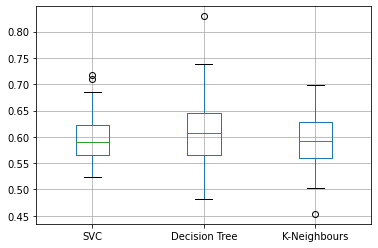

In [ ]:
no_steps_results.boxplot()

### Compare this against the baseline

##### Join the two datafarames together so we can easily compare them

In [ ]:
col_order = ["subject_id", "SVC_Baseline", "SVC_No_Steps", "Decision Tree_Baseline", "Decision Tree_No_Steps", "K-Neighbours_Baseline", "K-Neighbours_No_Steps"]

baseline_and_no_steps = baseline_results.merge(no_steps_results, how='inner', on='subject_id', suffixes=['_Baseline', '_No_Steps'])[col_order]

##### Output the joined dataframe to compare the classifier scores manually

In [ ]:
baseline_and_no_steps

,subject_id,SVC_Baseline,SVC_No_Steps,Decision Tree_Baseline,Decision Tree_No_Steps,K-Neighbours_Baseline,K-Neighbours_No_Steps
0,46343,0.524590,0.524590,0.535519,0.557377,0.420765,0.453552
1,759667,0.554140,0.554140,0.649682,0.611465,0.503185,0.503185
2,781756,0.589506,0.589506,0.496914,0.481481,0.561728,0.561728
3,844359,0.548822,0.548822,0.612795,0.531987,0.535354,0.535354
4,1066528,0.523962,0.523962,0.549521,0.565495,0.533546,0.533546
5,1360686,0.620915,0.620915,0.653595,0.666667,0.637255,0.637255
6,1449548,0.685714,0.685714,0.698413,0.666667,0.666667,0.666667
7,1455390,0.705696,0.718354,0.705696,0.715190,0.715190,0.699367
8,1818471,0.533123,0.561514,0.564669,0.536278,0.545741,0.555205
9,2598705,0.609524,0.590476,0.536508,0.546032,0.523810,0.523810


From looking at this table, the values look pretty similar.
We need to summarise these values somewhat to get a better understanding of which approach is better

##### Describe this dataframe

In [ ]:
baseline_and_no_steps.describe()

,SVC_Baseline,SVC_No_Steps,Decision Tree_Baseline,Decision Tree_No_Steps,K-Neighbours_Baseline,K-Neighbours_No_Steps
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.601326,0.597679,0.616065,0.613759,0.593656,0.590535
std,0.050517,0.049369,0.086878,0.073333,0.061696,0.054633
min,0.523962,0.523962,0.490566,0.481481,0.420765,0.453552
25%,0.568501,0.566076,0.552014,0.565391,0.557732,0.559533
50%,0.602875,0.590191,0.608219,0.607678,0.602220,0.593044
75%,0.631054,0.621737,0.650660,0.645900,0.628270,0.628270
max,0.709265,0.718354,0.878049,0.829268,0.715190,0.699367


After describing this dataframe, we can more clearly see that the mean scores of the classifiers when using the baseline configuration are marginally higher than.

When we look at the Decision Tree classifier, the gap between the two approaches becomes even more apparent as the maximum accuracy for one of the subjects using the baseline configuratio is almost 5% higher than the variation where no step count is decorded.

This points towards our hypothesis being correct for this experiment but we can double check this using a plot.

##### Plot the classifiers

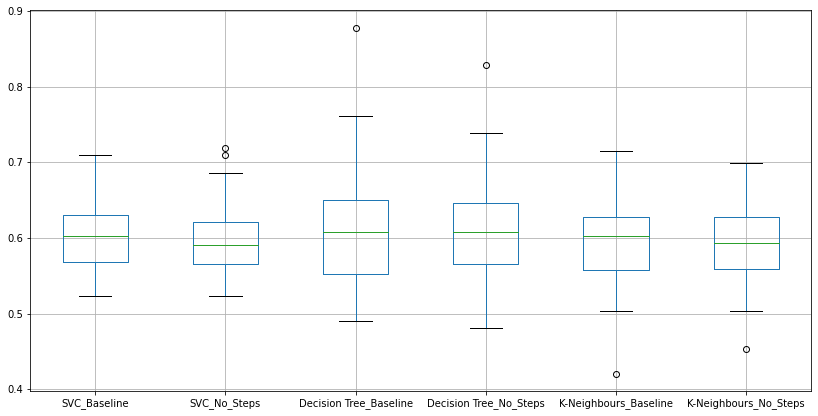

In [ ]:
baseline_and_no_steps.boxplot(figsize=(14,7))

This plot backs up what we saw from the above describe. We can see for each classifier, the boxplot on the left (the baseline results) shows more promising signs of its results being more accurate. While the improvement is not one of great magnitude, it still adds value to our classifier.

The step count feature will help to distinguish between the subject being asleep Vs being awake but it wont help to distinguish between the multiple sleep states. This is perhaps the reason why the results are minimal in some cases, as it only helps classify one particula psg status.

---

## Experiment 3 - Classify the sleep state using the optimised parameters Vs the default parameters


---

We were fairly confident that our approach in relation to this step was the best one to take. It makes sense that if you optimise parameters to make the best prediction of the psg_status based on the training data then your results will be mroe accurate.

Nevertheless, we felt it was important to validate this and ensure that the parameters that we gave the cross-validation optimiser were better than the default. We understood that if a value for one parameter is worse than the default, even if it is optimised, it will still be worse.

### Get the dataset and y for the models with the default parameters

In [ ]:
default_params_features_all_psg_dataset_and_y = create_map_of_subject_id_to_the_dataset_and_y_for_all_psg_status(subject_id_to_filtered_extracted_feature_df_map, map_subject_id_to_a_map_of_the_psg_status_to_session_id, map_subject_id_to_a_map_of_the_session_id_to_psg_status)

### Classify the dataset and y for the models with the default parameters

In [ ]:
optimise_params_bool = False
classification_report_bool = False
default_param_results = classify(default_params_features_all_psg_dataset_and_y, names_of_models_to_test, cv_settings, optimise_params_bool, classification_report_bool)

### Analyse these classified results

##### Output the results of the score each classifier got for each subject

In [ ]:
default_param_results

,subject_id,SVC,Decision Tree,K-Neighbours
0,46343,0.480874,0.622951,0.415301
1,759667,0.566879,0.649682,0.611465
2,781756,0.537037,0.475309,0.558642
3,844359,0.572391,0.535354,0.525253
4,1066528,0.523962,0.533546,0.507987
5,1360686,0.565359,0.653595,0.620915
6,1449548,0.622222,0.641270,0.692063
7,1455390,0.705696,0.696203,0.680380
8,1818471,0.533123,0.523659,0.526814
9,2598705,0.609524,0.546032,0.546032


##### Describe this dataframe better with summary statistics

In [ ]:
default_param_results.describe()

,SVC,Decision Tree,K-Neighbours
count,28.000000,28.000000,28.000000
mean,0.567762,0.585009,0.583274
std,0.053260,0.071605,0.059866
min,0.459350,0.472222,0.415301
25%,0.534224,0.534902,0.545670
50%,0.566119,0.570346,0.584657
75%,0.605201,0.634758,0.624204
max,0.705696,0.731861,0.692063


##### Plot these summary statistics to better visualise them

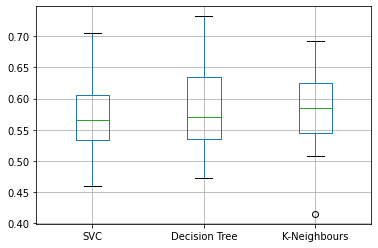

In [ ]:
default_param_results.boxplot()

### Compare this against the baseline

##### Join the two datafarames together so we can easily compare them

In [ ]:
col_order = ["subject_id", "SVC_Baseline", "SVC_Default_Param", "Decision Tree_Baseline", "Decision Tree_Default_Param", "K-Neighbours_Baseline", "K-Neighbours_Default_Param"]

baseline_and_default_param = baseline_results.merge(default_param_results, how='inner', on='subject_id', suffixes=['_Baseline', '_Default_Param'])[col_order]

##### Output the joined dataframe to compare the classifier scores manually

In [ ]:
baseline_and_default_param

,subject_id,SVC_Baseline,SVC_Default_Param,Decision Tree_Baseline,Decision Tree_Default_Param,K-Neighbours_Baseline,K-Neighbours_Default_Param
0,46343,0.524590,0.480874,0.535519,0.622951,0.420765,0.415301
1,759667,0.554140,0.566879,0.649682,0.649682,0.503185,0.611465
2,781756,0.589506,0.537037,0.496914,0.475309,0.561728,0.558642
3,844359,0.548822,0.572391,0.612795,0.535354,0.535354,0.525253
4,1066528,0.523962,0.523962,0.549521,0.533546,0.533546,0.507987
5,1360686,0.620915,0.565359,0.653595,0.653595,0.637255,0.620915
6,1449548,0.685714,0.622222,0.698413,0.641270,0.666667,0.692063
7,1455390,0.705696,0.705696,0.705696,0.696203,0.715190,0.680380
8,1818471,0.533123,0.533123,0.564669,0.523659,0.545741,0.526814
9,2598705,0.609524,0.609524,0.536508,0.546032,0.523810,0.546032


Again in this experiment, it is difficult to pinpoint which moddle is best from this table. For some subject_ids the classifier using the default parameters is best while in others the basline is best.

Due to the nature of parameters in general, this is always going to be the case as some parameter values work better in different situations.

It is important to agreate these values and get a summary of the overall performance of these parameters across all subjects.

##### Describe this dataframe

In [ ]:
baseline_and_default_param.describe()

,SVC_Baseline,SVC_Default_Param,Decision Tree_Baseline,Decision Tree_Default_Param,K-Neighbours_Baseline,K-Neighbours_Default_Param
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.601326,0.567762,0.616065,0.585009,0.593656,0.583274
std,0.050517,0.053260,0.086878,0.071605,0.061696,0.059866
min,0.523962,0.459350,0.490566,0.472222,0.420765,0.415301
25%,0.568501,0.534224,0.552014,0.534902,0.557732,0.545670
50%,0.602875,0.566119,0.608219,0.570346,0.602220,0.584657
75%,0.631054,0.605201,0.650660,0.634758,0.628270,0.624204
max,0.709265,0.705696,0.878049,0.731861,0.715190,0.692063


This summary informs us a bit more about the performance of the default parameters Vs our baseline optimised parameters.

This data description unresoundingly points towards the baseline being better. As expected, across all classifiers, the minimum classification, the maximum classificaton, and the mean classification is better using the optimised parameters.

This validates our hypothesis yet again.

##### Plot the classifiers

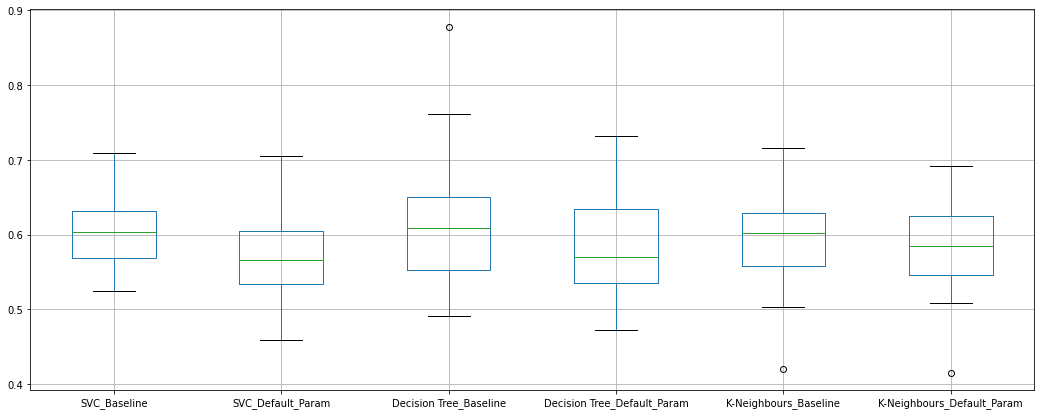

In [ ]:
baseline_and_default_param.boxplot(figsize=(18,7))

Again these plots show that the baseline optimised parameters are much better than the default parameters. As opposed to the box plots in the previous experiments, there is a more apparent positional difference between the boxes on these plots containing the middle 50% of the data.

Again, the Decision Tree model comes out trumps as the most accurate model.

---
---

# 5. Binary Classification of Asleep Vs Awake

---
---

One thing we also wanted to do was to see how good our classifier was at classifying the subjects sessions if it just focused on being awake and asleep.

Throught the whole project, we had focused on classifying the sessions using all of the psg_status values, whereas here, we merge all of the different sleep states into one to create a binary classification task.

We knew that because there were less classes, our classifiers would get much better accuracy so we wanted to test this.

### Get the dataset and y for the models with the default parameters

In [ ]:
binary_psg_status_dataset_and_y = create_map_of_subject_id_to_the_dataset_and_y_for_only_awake_and_asleep_psg_status(subject_id_to_filtered_extracted_feature_df_map, map_subject_id_to_a_map_of_the_psg_status_to_session_id, map_subject_id_to_a_map_of_the_session_id_to_psg_status)

### Classify the dataset and y for the models with the default parameters

In [ ]:
optimise_params_bool = True
classification_report_bool = True
binary_results, binary_classification_report_dict = classify(binary_psg_status_dataset_and_y, names_of_models_to_test, cv_settings, optimise_params_bool, classification_report_bool)

### Analyse the results

##### Output the results of the score each classifier got for each subject

In [ ]:
binary_results

,subject_id,SVC,Decision Tree,K-Neighbours
0,46343,0.846995,0.819672,0.841530
1,759667,0.942675,0.961783,0.942675
2,781756,0.925926,0.882716,0.932099
3,844359,0.905724,0.912458,0.919192
4,1066528,0.843450,0.840256,0.821086
5,1360686,0.915033,0.905229,0.911765
6,1449548,0.882540,0.892063,0.888889
7,1455390,0.901899,0.857595,0.901899
8,1818471,0.990536,0.977918,0.990536
9,2598705,0.987302,0.958730,0.987302


From this output table, we can already see that the accuracy scores are much better. It will be interesting to roll up on this information to find out a higher level summary of it.

##### Describe this dataframe better with summary statistics

In [ ]:
binary_results.describe()

,SVC,Decision Tree,K-Neighbours
count,28.000000,28.000000,28.000000
mean,0.901823,0.894589,0.914524
std,0.069691,0.046666,0.045414
min,0.658537,0.819672,0.818182
25%,0.891561,0.858267,0.898646
50%,0.907264,0.890121,0.915478
75%,0.940431,0.929471,0.938050
max,0.990536,0.977918,0.990536


One thing that sticks out immediately is the fact that, unlike when we were classifying with multiple psg_status values, the Decision Tree classifier is actually the worst of the few classifiers that we used.
We can see that in comparison to the Support Vector Classifier (SVC) and the K-Neighbours Classifier, the Decision Tree classifier had the worst mean, minimum and maximum accuracy across the subjects.

One other thing that also strook me was that for some subjects, we were able to get an accuracy score of >99%. This is a massive victory for both svc and the k-neighbours classifiers.

While out of the two other classifiers, when we discount the Decision Tree, the results are similar enough, the K-Neighbours classsifier does pull out just ahead. We can talk further on this point after we plot this

##### Plot these summary statistics to better visualise them

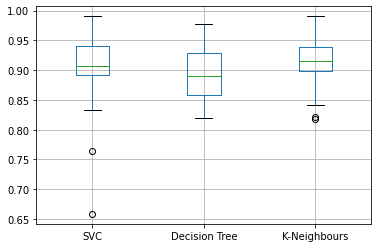

In [ ]:
binary_results.boxplot()

This plot clearly illustrates the point noted above, that the K-Neighbours classifier is the best clasifier in the case of just looking for a binary, sleep Vs awake, classifier.

While it still contains the few outliers to do downside that are seen in every K-Neighbours box plot thus far in this notebook, in this case, these outliers are still much higher than those in the SVC classifier.

Using our knowledge of these classifiers, it makes sense for this data that the K-Neighbours classifier is the best when it comes to the binary task of classifying the the subject is awake or asleep. K-Neighbours would take advantage of the massive similarity between the time series when the subject is awake and also the similarity betwee time series when the subject is asleep.

When we use the knowledge we have on decision tree classifiers, it also makes sense that when it performed better than the other classifiers in the case when there were multiple psg_status that need to be classified.
Decision trees involve a complexity that the other two models don't seem to be able to breach. This allows the decision tree to optimise itself to take better advantage of the all the features and more accurately predict the psg_status.

---
---

# 6. Analyse the distribution of the precision & recall values with each psg_status

---
---

Using the data below, we had planned to create a diagram for each model showing average precision and recall values across all the subjects for each model and psg status pair.

We wanted to show on average which model and psg status pair gave the best recall, precision and F1 score to see how the different models might have had different effects on these metrics and also to see how the different psg_status' influenced these metrics.

Due to the structure of the classification report dictionary returned and the time contraints, we were unable to dig our heals into this problem properly and perform this analysis.

The below are the outputs to the classification reports dictionaries with:
1.   All the psg_status being classified
2.   Just awake and asleep being classified


In [ ]:
baseline_classification_report_dict

{'1066528': {'Decision Tree': {'0': {'f1-score': 0.4158415841584158,
    'precision': 0.39622641509433965,
    'recall': 0.4375,
    'support': 48},
   '1': {'f1-score': 0.14035087719298248,
    'precision': 0.14285714285714285,
    'recall': 0.13793103448275862,
    'support': 29},
   '2': {'f1-score': 0.574074074074074,
    'precision': 0.6019417475728155,
    'recall': 0.5486725663716814,
    'support': 113},
   '3': {'f1-score': 0.3018867924528302,
    'precision': 0.3076923076923077,
    'recall': 0.2962962962962963,
    'support': 27},
   '5': {'f1-score': 0.7738693467336684,
    'precision': 0.7475728155339806,
    'recall': 0.8020833333333334,
    'support': 96},
   'accuracy': 0.549520766773163,
   'macro avg': {'f1-score': 0.44120453492239414,
    'precision': 0.43925808575011727,
    'recall': 0.44449664609681394,
    'support': 313},
   'weighted avg': {'f1-score': 0.5474228195885923,
    'precision': 0.5471432113165113,
    'recall': 0.549520766773163,
    'support': 313}}

In [ ]:
binary_classification_report_dict

{'1066528': {'Decision Tree': {'0': {'f1-score': 0.4074074074074074,
    'precision': 0.36666666666666664,
    'recall': 0.4583333333333333,
    'support': 48},
   '1': {'f1-score': 0.8764478764478765,
    'precision': 0.8972332015810277,
    'recall': 0.8566037735849057,
    'support': 265},
   'accuracy': 0.7955271565495208,
   'macro avg': {'f1-score': 0.641927641927642,
    'precision': 0.6319499341238471,
    'recall': 0.6574685534591195,
    'support': 313},
   'weighted avg': {'f1-score': 0.804518347649338,
    'precision': 0.8158683655558222,
    'recall': 0.7955271565495208,
    'support': 313}},
  'K-Neighbours': {'0': {'f1-score': 0.3,
    'precision': 0.375,
    'recall': 0.25,
    'support': 48},
   '1': {'f1-score': 0.8974358974358975,
    'precision': 0.8718861209964412,
    'recall': 0.9245283018867925,
    'support': 265},
   'accuracy': 0.8210862619808307,
   'macro avg': {'f1-score': 0.5987179487179487,
    'precision': 0.6234430604982206,
    'recall': 0.58726415094

At the start of this project, we had one concern in our heads and it revolved around sneaky algorithms with low precision and recall. We didn't want our model too jst predict the most common class for all classes and thus to get a good accuracy.
This is partly why we decided not to go with the binary sleep Vs awake from the get go as in this situation, it is easier for a model to predict the exact same class for each session - this is because the person is awake most of the time.

But our worries are just that, worries, and did not materialise for us.

From a quick analysis of these returned dictionaries, you can see that our precision and recall scores lay in the region of 0.4 to 0.9 and the F1 scores are similar. This is a healthy range and nothing to be concerned about.

---
---

# 7. Conclustion and Results

---
---

The project for this assignent was different to the last one where there wa s alot more to it. With the lat project, we had one dataset to use and one classifier type to use whereas the scope for this project was more endless. 

This posed some interesting new challenges for us but also put us under a bit more pressure in tackling these and made us have to work hard and plan our our approaches more. This all meant lots of learning which is definitely a plus, and we were able to perform some interesting analysis.

Due to the bulk in th eproject between prepering the data, extracting features and then formatting everything, we didnt get a lot of time to focus on the classification and analysis so we decided to take a simple approach using just three classifiers thw whole way through. While this limited us when choosing the best model, it also gave us a chance to dive further into these specific models and understand them better.

This understanding held true throughout the project as seen by our experiments where all of our hypotheses were correct. While it is ok to think a certain way using intuition, it is always important to test and verify along the way to ensure you understand what is going on and are in sinc with the process.